In [ ]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
df = pd.read_excel("RELC 351 Professors.xlsx", index_col="Professor")

In [ ]:
display(df)
indexes_professors = df.index #for later use

,Overall,Difficulty,Retake
Professor,,,
"Reed, Andrew",3.9,3.2,0.76
"Wilkinson, Gregory",3.5,2.6,0.70
"Gaskill, Alonzo",4.4,2.9,0.88
"MacKay, Michael",3.9,2.7,0.68


In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 
data_scaled = scaler.fit_transform(df)
df_norm = pd.DataFrame(data=data_scaled, columns=['Overall', 'Difficulty', 'Retake Rate'], index = indexes_professors)
display(df_norm)

,Overall,Difficulty,Retake Rate
Professor,,,
"Reed, Andrew",0.444444,1.000000,0.4
"Wilkinson, Gregory",0.000000,0.000000,0.1
"Gaskill, Alonzo",1.000000,0.500000,1.0
"MacKay, Michael",0.444444,0.166667,0.0


In [ ]:
#invert Difficulty so it doesn't give inaccurate weight in final average
df_norm['Difficulty'] = 1.0 - df_norm['Difficulty']
#display(df_norm)

for row in df_norm.index:
  for col in df_norm.columns:
    if abs(df_norm.loc[row, col]) < 0.0000000001:
      df_norm.loc[row, col] = 0

display(df_norm)

,Overall,Difficulty,Retake Rate
Professor,,,
"Reed, Andrew",0.444444,0.000000,0.4
"Wilkinson, Gregory",0.000000,1.000000,0.1
"Gaskill, Alonzo",1.000000,0.500000,1.0
"MacKay, Michael",0.444444,0.833333,0.0


In [ ]:
#Scale the categories for a final weighted average. Scales are broken down as follows (percentage):
# Overall - 30%
# Difficulty - 50%
# Retake Rate - 20%

df_norm['Overall'] *= 0.6
df_norm['Difficulty'] *= 0.7
df_norm['Retake Rate'] *= 0.6

display(df_norm)

,Overall,Difficulty,Retake Rate
Professor,,,
"Reed, Andrew",0.266667,0.000000,0.24
"Wilkinson, Gregory",0.000000,0.700000,0.06
"Gaskill, Alonzo",0.600000,0.350000,0.60
"MacKay, Michael",0.266667,0.583333,0.00


In [ ]:
#Computes the weighted average and sorts the dataframe by highest weighted average
#to see the best professor.

df_norm['Weighted Average'] = df_norm.mean(axis=1)
df_norm.sort_values(by=['Weighted Average'], inplace=True, ascending=False)
display(df_norm)

,Overall,Difficulty,Retake Rate,Weighted Average
Professor,,,,
"Gaskill, Alonzo",0.600000,0.350000,0.60,0.516667
"MacKay, Michael",0.266667,0.583333,0.00,0.283333
"Wilkinson, Gregory",0.000000,0.700000,0.06,0.253333
"Reed, Andrew",0.266667,0.000000,0.24,0.168889


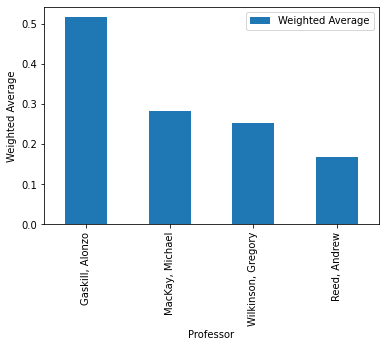

In [ ]:
#visualize

_ = df_norm.plot(kind='bar', y='Weighted Average')
_ = plt.ylabel('Weighted Average')
plt.show()